In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset source:

> Prasetyo, Eko; Suciati, Nanik; Fatichah, Chastine (2021), “Fish-gres Dataset for Fish Species Classification”, Mendeley Data, V2, doi: 10.17632/76cr3wfhff.2



In [2]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [3]:
source_path = '/content/drive/MyDrive/Capstone_Fishku/fish_classifications'

source_path_bandeng = os.path.join(source_path, 'Ikan_Bandeng')
source_path_kembung = os.path.join(source_path, 'Ikan_Kembung')
source_path_kuniran = os.path.join(source_path, 'Ikan_Kuniran')
source_path_mujair = os.path.join(source_path, 'Ikan_Mujair')
source_path_nila = os.path.join(source_path, 'Ikan_Nila')

print(f"There are {len(os.listdir(source_path_bandeng))} images of bandeng.")
print(f"There are {len(os.listdir(source_path_kembung))} images of kembung.")
print(f"There are {len(os.listdir(source_path_kuniran))} images of kuniran.")
print(f"There are {len(os.listdir(source_path_mujair))} images of mujair.")
print(f"There are {len(os.listdir(source_path_nila))} images of nila.")

There are 500 images of bandeng.
There are 544 images of kembung.
There are 577 images of kuniran.
There are 331 images of mujair.
There are 564 images of nila.


In [4]:
# Define root directory
root_dir = '/tmp/fish_classifications'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """

  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter
  train_path = os.path.join(root_path, 'training')
  os.makedirs(train_path)
  os.makedirs(os.path.join(train_path, 'bandeng'))
  os.makedirs(os.path.join(train_path, 'kembung'))
  os.makedirs(os.path.join(train_path, 'kuniran'))
  os.makedirs(os.path.join(train_path, 'mujair'))
  os.makedirs(os.path.join(train_path, 'nila'))

  val_path = os.path.join(root_path, 'validation')
  os.makedirs(val_path)
  os.makedirs(os.path.join(val_path, 'bandeng'))
  os.makedirs(os.path.join(val_path, 'kembung'))
  os.makedirs(os.path.join(val_path, 'kuniran'))
  os.makedirs(os.path.join(val_path, 'mujair'))
  os.makedirs(os.path.join(val_path, 'nila'))

  # test_path = os.path.join(root_path, 'testing')
  # os.makedirs(test_path)
  # os.makedirs(os.path.join(test_path, 'bandeng'))
  # os.makedirs(os.path.join(test_path, 'kembung'))
  # os.makedirs(os.path.join(test_path, 'kuniran'))
  # os.makedirs(os.path.join(test_path, 'mujair'))
  # os.makedirs(os.path.join(test_path, 'nila'))
  ### END CODE HERE


try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
# Test your create_train_val_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/fish_classifications/validation
/tmp/fish_classifications/training
/tmp/fish_classifications/validation/kembung
/tmp/fish_classifications/validation/bandeng
/tmp/fish_classifications/validation/kuniran
/tmp/fish_classifications/validation/mujair
/tmp/fish_classifications/validation/nila
/tmp/fish_classifications/training/kembung
/tmp/fish_classifications/training/bandeng
/tmp/fish_classifications/training/kuniran
/tmp/fish_classifications/training/mujair
/tmp/fish_classifications/training/nila


In [6]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """
  all_files = []

  # check zero file
  for file_name in os.listdir(SOURCE_DIR):
    file_source = os.path.join(SOURCE_DIR, file_name)
    if os.path.getsize(file_source):
      all_files.append(file_name)
    else:
      print(f'{file_name} is zero length, so ignoring.')

  # split list
  randomize_files = random.sample(all_files, len(all_files))
  total_training = int(len(all_files) * SPLIT_SIZE)
  train_list = randomize_files[:total_training]
  val_list = randomize_files[total_training:]

  for file_ in train_list:
    copyfile(file_source, os.path.join(TRAINING_DIR, file_))

  for file_ in val_list:
    copyfile(file_source, os.path.join(VALIDATION_DIR, file_))

In [8]:
# Test your split_data function

# Define paths
BANDENG_SOURCE_DIR = source_path_bandeng
KEMBUNG_SOURCE_DIR = source_path_kembung
KUNIRAN_SOURCE_DIR = source_path_kuniran
MUJAIR_SOURCE_DIR = source_path_mujair
NILA_SOURCE_DIR = source_path_nila

TRAINING_DIR = '/tmp/fish_classifications/training/'
VALIDATION_DIR = "/tmp/fish_classifications/validation/"

TRAINING_BANDENG_DIR = os.path.join(TRAINING_DIR, "bandeng/")
VALIDATION_BANDENG_DIR = os.path.join(VALIDATION_DIR, "bandeng/")

TRAINING_KEMBUNG_DIR = os.path.join(TRAINING_DIR, "kembung/")
VALIDATION_KEMBUNG_DIR = os.path.join(VALIDATION_DIR, "kembung/")

TRAINING_KUNIRAN_DIR = os.path.join(TRAINING_DIR, "kuniran/")
VALIDATION_KUNIRAN_DIR = os.path.join(VALIDATION_DIR, "kuniran/")

TRAINING_MUJAIR_DIR = os.path.join(TRAINING_DIR, "mujair/")
VALIDATION_MUJAIR_DIR = os.path.join(VALIDATION_DIR, "mujair/")

TRAINING_NILA_DIR = os.path.join(TRAINING_DIR, "nila/")
VALIDATION_NILA_DIR = os.path.join(VALIDATION_DIR, "nila/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_BANDENG_DIR)) > 0:
  for file in os.scandir(TRAINING_BANDENG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KEMBUNG_DIR)) > 0:
  for file in os.scandir(TRAINING_KEMBUNG_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_KUNIRAN_DIR)) > 0:
  for file in os.scandir(TRAINING_KUNIRAN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_MUJAIR_DIR)) > 0:
  for file in os.scandir(TRAINING_MUJAIR_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_NILA_DIR)) > 0:
  for file in os.scandir(TRAINING_NILA_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_BANDENG_DIR)) > 0:
  for file in os.scandir(VALIDATION_BANDENG_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KEMBUNG_DIR)) > 0:
  for file in os.scandir(VALIDATION_KEMBUNG_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KUNIRAN_DIR)) > 0:
  for file in os.scandir(VALIDATION_KUNIRAN_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_MUJAIR_DIR)) > 0:
  for file in os.scandir(VALIDATION_MUJAIR_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_NILA_DIR)) > 0:
  for file in os.scandir(VALIDATION_NILA_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .7

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(BANDENG_SOURCE_DIR, TRAINING_BANDENG_DIR, VALIDATION_BANDENG_DIR, split_size)
split_data(KEMBUNG_SOURCE_DIR, TRAINING_KEMBUNG_DIR, VALIDATION_KEMBUNG_DIR, split_size)
split_data(KUNIRAN_SOURCE_DIR, TRAINING_KUNIRAN_DIR, VALIDATION_KUNIRAN_DIR, split_size)
split_data(MUJAIR_SOURCE_DIR, TRAINING_MUJAIR_DIR, VALIDATION_MUJAIR_DIR, split_size)
split_data(NILA_SOURCE_DIR, TRAINING_NILA_DIR, VALIDATION_NILA_DIR, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal bandeng directory has {len(os.listdir(BANDENG_SOURCE_DIR))} images")
print(f"Original kembung directory has {len(os.listdir(KEMBUNG_SOURCE_DIR))} images")
print(f"Original kuniran directory has {len(os.listdir(KUNIRAN_SOURCE_DIR))} images")
print(f"Original mujair directory has {len(os.listdir(MUJAIR_SOURCE_DIR))} images")
print(f"Original nila directory has {len(os.listdir(NILA_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
print(f"There are {len(os.listdir(TRAINING_BANDENG_DIR))} images of bandeng for training")
print(f"There are {len(os.listdir(TRAINING_KEMBUNG_DIR))} images of kembung for training")
print(f"There are {len(os.listdir(TRAINING_KUNIRAN_DIR))} images of kuniran for training")
print(f"There are {len(os.listdir(TRAINING_MUJAIR_DIR))} images of mujair for training")
print(f"There are {len(os.listdir(TRAINING_NILA_DIR))} images of nila for training\n")

print(f"There are {len(os.listdir(VALIDATION_BANDENG_DIR))} images of bandeng for validation")
print(f"There are {len(os.listdir(VALIDATION_KEMBUNG_DIR))} images of kembung for validation")
print(f"There are {len(os.listdir(VALIDATION_KUNIRAN_DIR))} images of kuniran for validation")
print(f"There are {len(os.listdir(VALIDATION_MUJAIR_DIR))} images of mujair for validation")
print(f"There are {len(os.listdir(VALIDATION_NILA_DIR))} images of nila for validation\n")



Original bandeng directory has 500 images
Original kembung directory has 544 images
Original kuniran directory has 577 images
Original mujair directory has 331 images
Original nila directory has 564 images

There are 350 images of bandeng for training
There are 380 images of kembung for training
There are 403 images of kuniran for training
There are 231 images of mujair for training
There are 394 images of nila for training

There are 150 images of bandeng for validation
There are 164 images of kembung for validation
There are 174 images of kuniran for validation
There are 100 images of mujair for validation
There are 170 images of nila for validation



In [14]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=128,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))

  return train_generator, validation_generator

In [15]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1758 images belonging to 5 classes.
Found 758 images belonging to 5 classes.


In [34]:
def create_model():

  model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
  ])


  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


  return model

In [35]:
# Get the untrained model
model = create_model()

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 74, 74, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 17, 17, 128)      

In [36]:
# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    # verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
14/14 [==============================] - 18s 1s/step - loss: 1.5479 - accuracy: 0.3288 - val_loss: 1.0093 - val_accuracy: 0.6517
Epoch 2/15
14/14 [==============================] - 16s 1s/step - loss: 1.2352 - accuracy: 0.5711 - val_loss: 0.5346 - val_accuracy: 1.0000
Epoch 3/15
14/14 [==============================] - 17s 1s/step - loss: 0.5212 - accuracy: 0.8282 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 4/15
14/14 [==============================] - 17s 1s/step - loss: 0.2676 - accuracy: 0.9005 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 5/15
14/14 [==============================] - 15s 1s/step - loss: 0.1799 - accuracy: 0.9352 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 6/15
14/14 [==============================] - 14s 1s/step - loss: 0.0574 - accuracy: 0.9835 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 7/15
14/14 [==============================] - 14s 949ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 8/15
14/14 

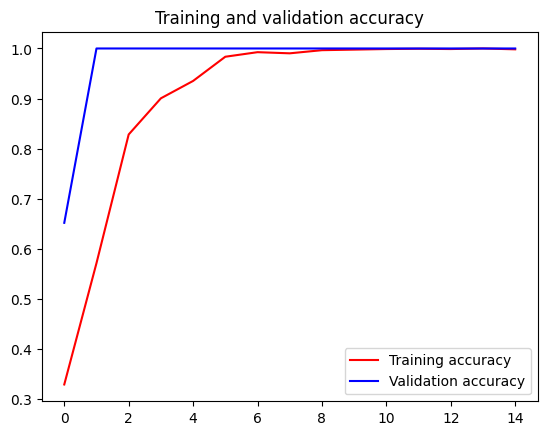

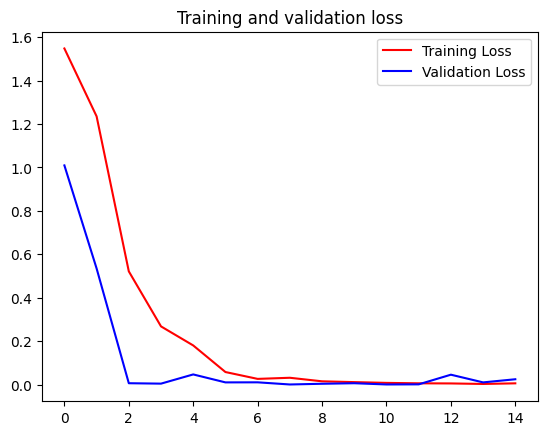

In [37]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
model_dir = os.path.join(root_dir, 'fish_classification.h5')

model.save(model_dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving IMG_20190930_070337.tif to IMG_20190930_070337.tif
1/1 [==============================] - 0s 42ms/step
IMG_20190930_070337.tif
[[0. 0. 0. 0. 1.]]
